1. Найти  данные  для  классификации.  Данные  в  группе  повторяться  не должны. Предобработать данные, если это необходимо

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


In [34]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

print(df['target'].value_counts())
print(df.isnull().sum())

target
1    71
0    59
2    48
Name: count, dtype: int64
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


2. Изобразить гистограмму, которая показывает баланс классов. Сделать 
выводы

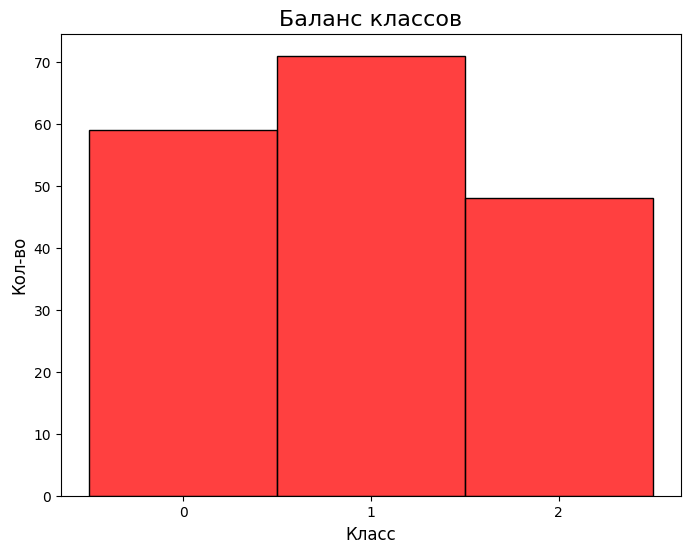

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=3, kde=False, color='red', discrete=True)
plt.title('Баланс классов', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Кол-во', fontsize=12)
plt.xticks([0, 1, 2], labels=["0", "1", "2"])

plt.show()

В трех классах разное количество объектов, что может негативно повлиять на обучение

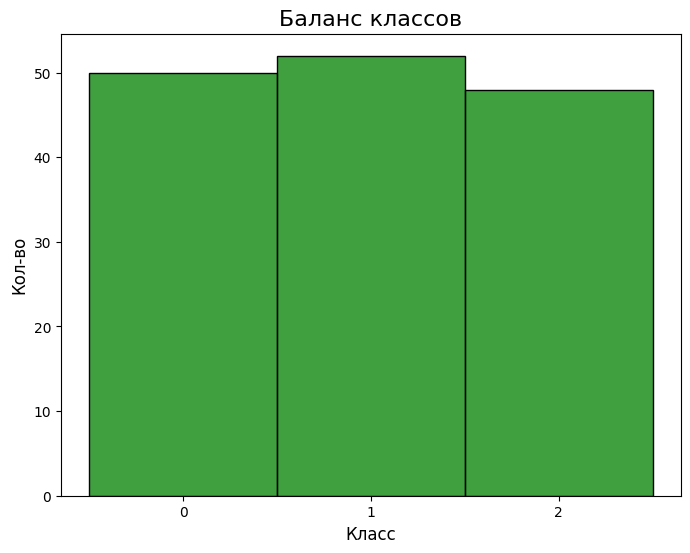

Новое распределение классов:
target
1    52
0    50
2    48
Name: count, dtype: int64


In [39]:
df_class_2 = df[df['target'] == 2]
df_class_0 = df[df['target'] == 0].sample(n=50, random_state=42)
df_class_1 = df[df['target'] == 1].sample(n=52, random_state=42)

df_balanced = pd.concat([df_class_0, df_class_1, df_class_2])

plt.figure(figsize=(8, 6))
sns.histplot(df_balanced['target'], bins=3, kde=False, color='g', discrete=True)
plt.title('Баланс классов', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Кол-во', fontsize=12)
plt.xticks([0, 1, 2], labels=["0", "1", "2"])

plt.show()

print("Новое распределение классов:")
print(df_balanced['target'].value_counts())

Теперь количество объектов в классах равномерное

3. Разбить  выборку  на  тренировочную  и  тестовую.  Тренировочная  для обучения модели, тестовая для проверки ее качества.

In [41]:
# X-признаки, y-целевая переменная
X = df_balanced.drop(columns=['target'])
y = df_balanced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")


Размер тренировочной выборки: 120
Размер тестовой выборки: 30


4.  Применить алгоритмы классификации: логистическая регрессия, SVM, KNN.  Построить  матрицу  ошибок  по  результатам  работы  моделей 
(использовать confusion_matrix из sklearn.metrics)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

c:\Users\Ева\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [56]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

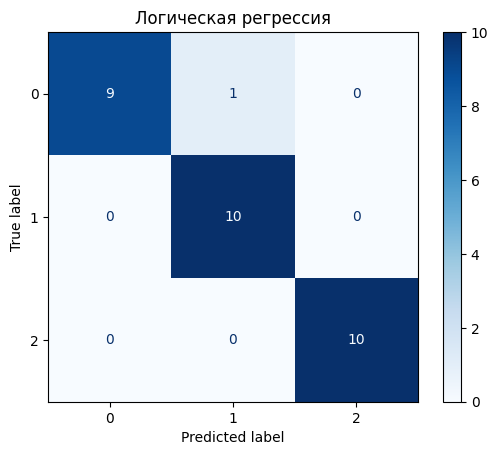

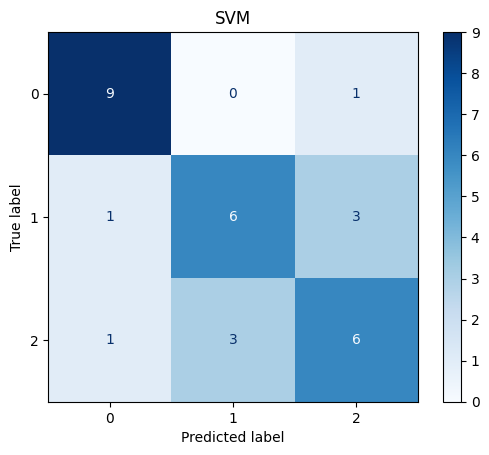

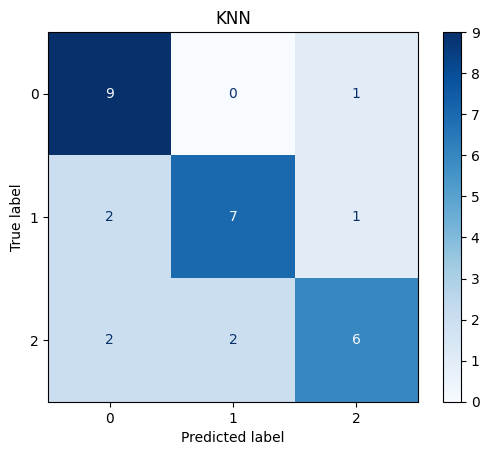

In [59]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log_reg, 'Логическая регрессия')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

Пример анализа матрицы ошибок для логической регрессии:
Класс 0:
9 раз правильно предсказано как класс 0
ни один объект класса 1 или 2 не был ошибочно классифицирован как класс 0
один объект класса 0 был ошибочно классифицирован как класс 1
Класс 1:
10 раз объекты класса 1 правильно предсказаны
ни один объект класса 0 или 2 не был ошибочно классифицирован как класс 1
нет объектов класса 1, классифицированных как 0 или 2
Класс 2: 
10 раз правильно предсказано как 2 класс
ни разу объект второго класса не был предсказан как 0 или 1
ни один объект класса 0 или 1 не был ошибочно предсказан как 2

5. Сравнить  результаты  классификации,  используя  accuracy,  precision, recall  и  f1-меру  (можно  использовать  classification_report  из sklearn.metrics). Сделать выводы.

In [65]:
from sklearn.metrics import classification_report

report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Класс 0', 'Класс 1', 'Класс 2'])
report_svm = classification_report(y_test, y_pred_svm, target_names=['Класс 0', 'Класс 1', 'Класс 2'])
report_knn = classification_report(y_test, y_pred_knn, target_names=['Класс 0', 'Класс 1', 'Класс 2'])

print("Логистическая регрессия:")
print(report_log_reg)

print("SVM:")
print(report_svm)

Логистическая регрессия:
              precision    recall  f1-score   support

     Класс 0       1.00      0.90      0.95        10
     Класс 1       0.91      1.00      0.95        10
     Класс 2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

SVM:
              precision    recall  f1-score   support

     Класс 0       0.82      0.90      0.86        10
     Класс 1       0.67      0.60      0.63        10
     Класс 2       0.60      0.60      0.60        10

    accuracy                           0.70        30
   macro avg       0.69      0.70      0.70        30
weighted avg       0.69      0.70      0.70        30



In [66]:
print("KNN:")
print(report_knn)

KNN:
              precision    recall  f1-score   support

     Класс 0       0.69      0.90      0.78        10
     Класс 1       0.78      0.70      0.74        10
     Класс 2       0.75      0.60      0.67        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



Логистическая регрессия является наилучшей моделью для данной задачи, показывая отличные результаты по всем классам.
KNN, хотя и имеет приемлемые результаты, показывает недостатки, особенно в отношении класса 2 и может потребовать доработки.
SVM и KNN имеют схожие общие показатели, но различаются в производительности по классам, что подчеркивает важность выбора подходящей модели для конкретной задачи.